### ADVANCED STATISTICS FOR PHYSICS ANALYSIS, Physics of Data
###  Student: Matteo Guida 
### ID Number: 1211201

# Sheet 2

In [1]:
install.packages('latex2exp')
library(latex2exp)

Installing package into ‘/home/guida/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


## Exercise 0

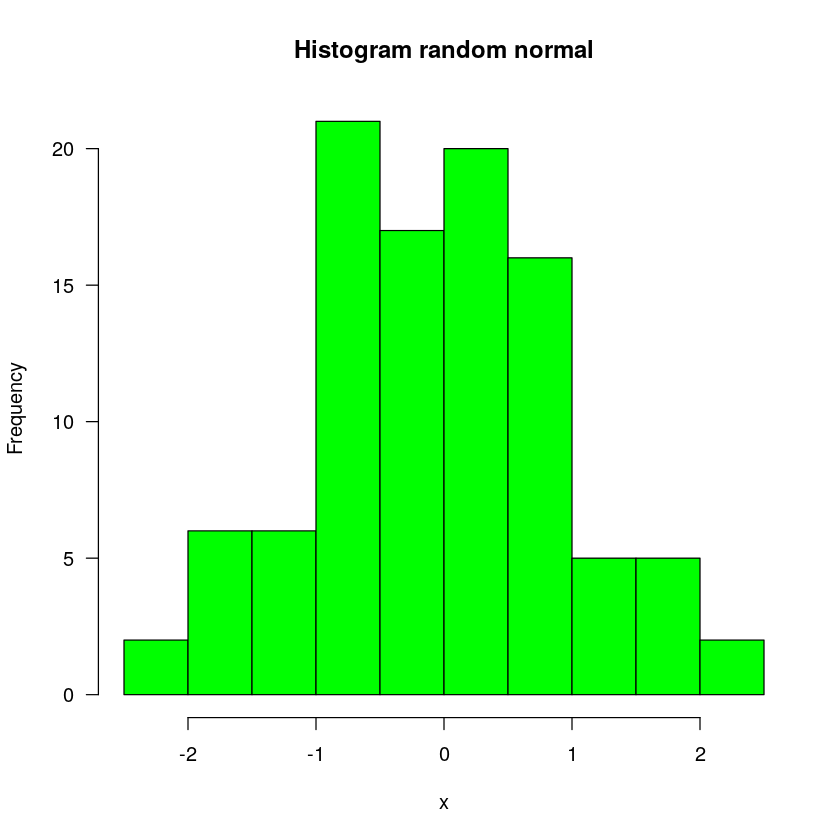

In [2]:
data<-rnorm(100,mean=0,sd=1)
h1<-hist(data,main="Histogram random normal", xlab="x",col="green",las=1,breaks=15)

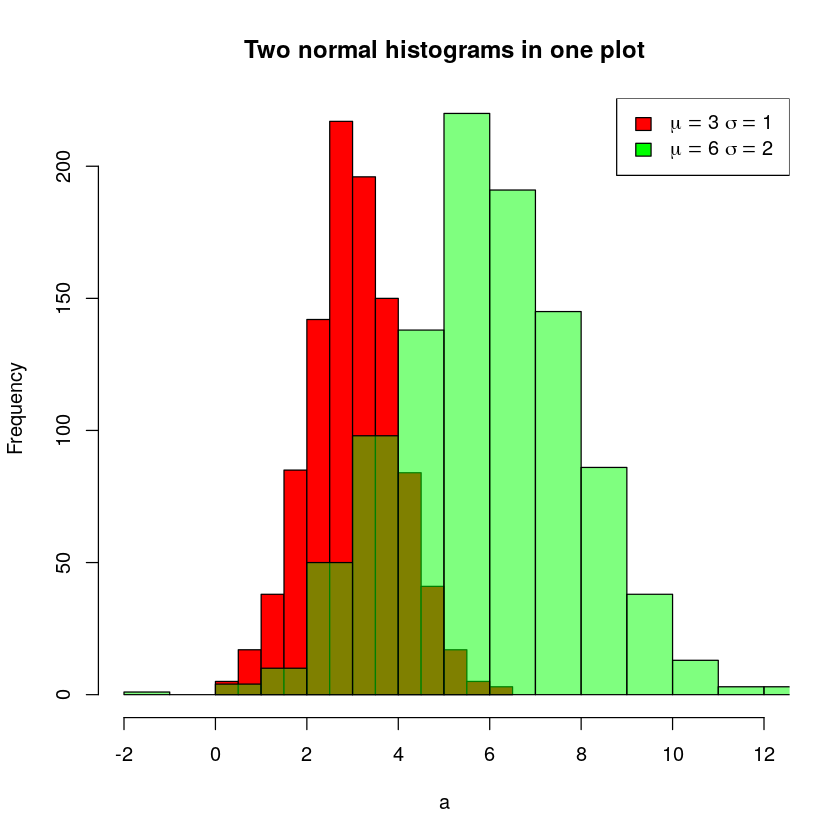

In [3]:
set.seed(223)
a=rnorm(1000, 3, 1)
b=rnorm(1000, 6, 2)
hist(a, xlim=c(-2,12), col="red",main="Two normal histograms in one plot")
hist(b, add=T, col=rgb(0, 1, 0, 0.5))
legend("topright", c(TeX("$ \\mu = 3 \\, \\sigma = 1$"), TeX("$ \\mu = 6 \\, \\sigma = 2$")), fill=c("red", "green"))

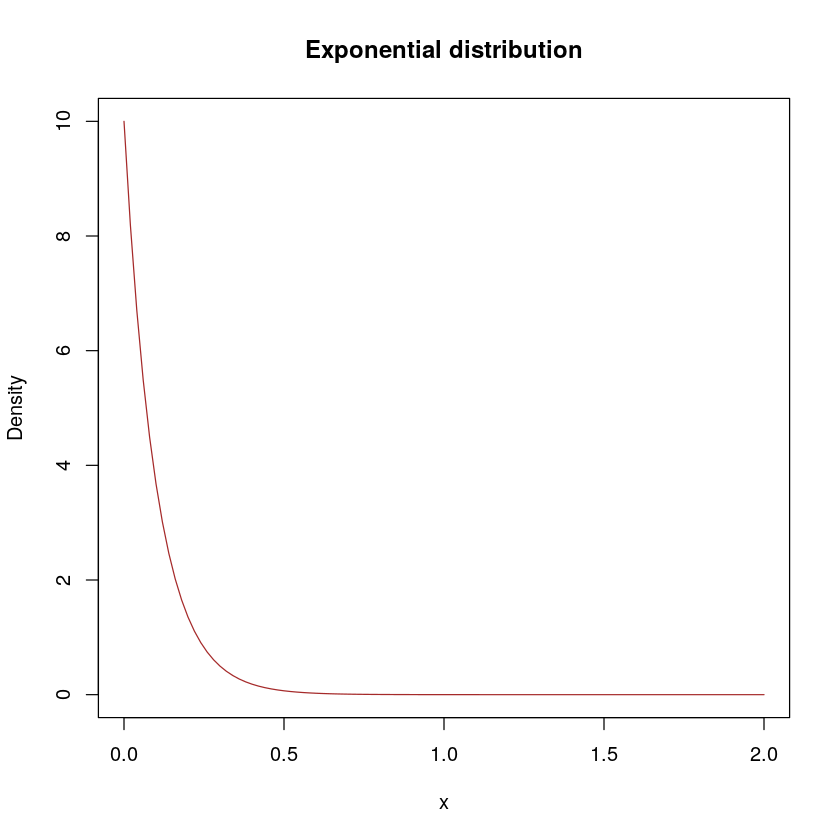

In [4]:
curve(dexp(x, rate = 10), from = 0, to = 2, main = "Exponential distribution",col="brown", ylab = "Density")

## Exercise 1

In [14]:
x=c(15.58,15.9,16,16.1,16.2) 
p1=c(0.15,0.21,0.35,0.15,0.14)
p2=c(0.14,0.05,0.64,0.08,0.09)
expect1=sum(x*p1)
cat(paste("expect1 = ",expect1),"\n")
expect2=sum(x*p2)
cat(paste("expect2 = ",expect2),"\n")
var1=sum(x*x*p1)-expect1^2
cat(paste("var1 = ",var1),"\n")
var2=sum(x*x*p2)-expect2^2
cat(paste("var2 = ",var2),"\n")

expect1 =  15.959 
expect2 =  15.9622 
var1 =  0.0339790000000164 
var2 =  0.0281671599999811 


## Exercise 2

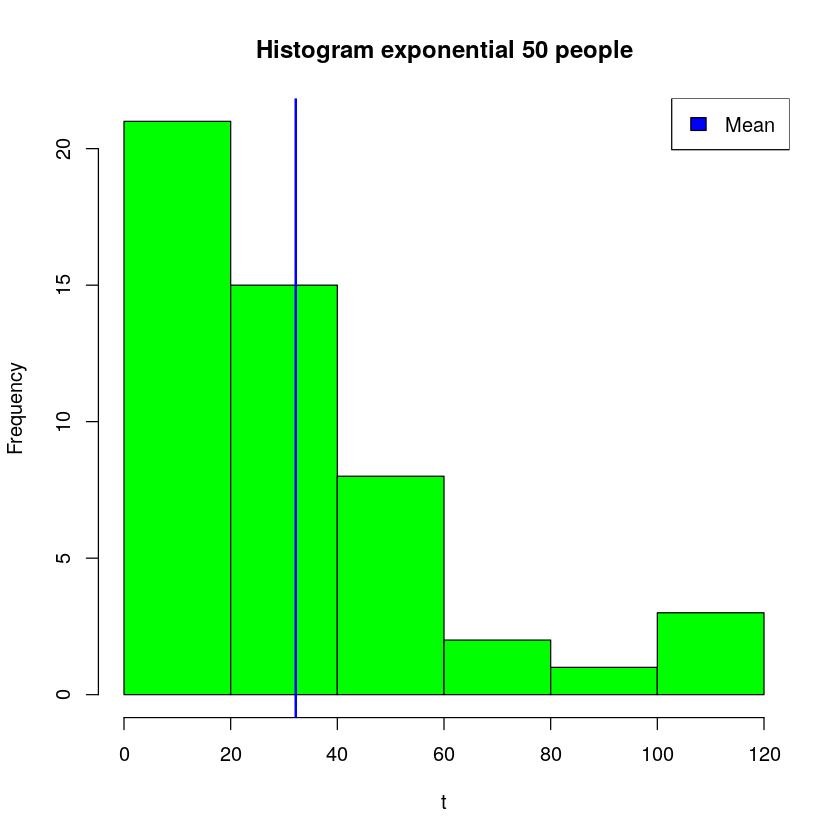

In [18]:
set.seed(223)
simul=rexp(50,1/30)
h2=hist(simul,main="Histogram exponential 50 people", xlab="t",col="green")
integrand0=function(x) {1/30*exp(-x/30)}
prob1=integrate(integrand0, lower = 0, upper = 10)
prob2=integrate(integrand0, lower = 60, upper = Inf)
meanteo=integrate(function(x) {x*integrand0(x)}, lower = 0, upper = Inf)
mx <- mean(simul)
abline(v = mx, col = "blue", lwd = 2)
legend("topright", "Mean", fill="blue")

In [30]:
cat(paste("P(t < 10) = "))
print(prob1)
cat(paste("mu_teo = "))
print(meanteo)
cat(paste("mu_exp = ",mx,"\n"))
cat(paste("P(t > 60) = "))
print(prob2)

P(t < 10) = 0.2834687 with absolute error < 3.1e-15
mu_teo = 30 with absolute error < 2.5e-05
mu_exp =  32.2041268719973 
P(t > 60) = 0.1353353 with absolute error < 3e-05


## Exercise 3

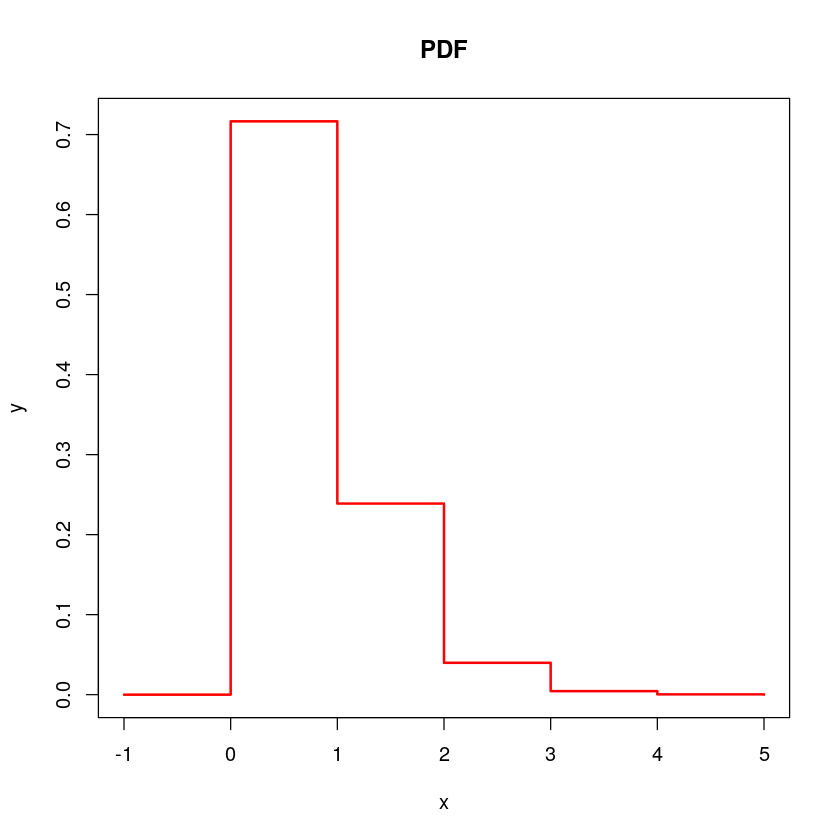

In [7]:
x=-1:5
y=dpois(x,1/3)
plot(x,y,type="s",lwd=2,col="red",main="PDF")

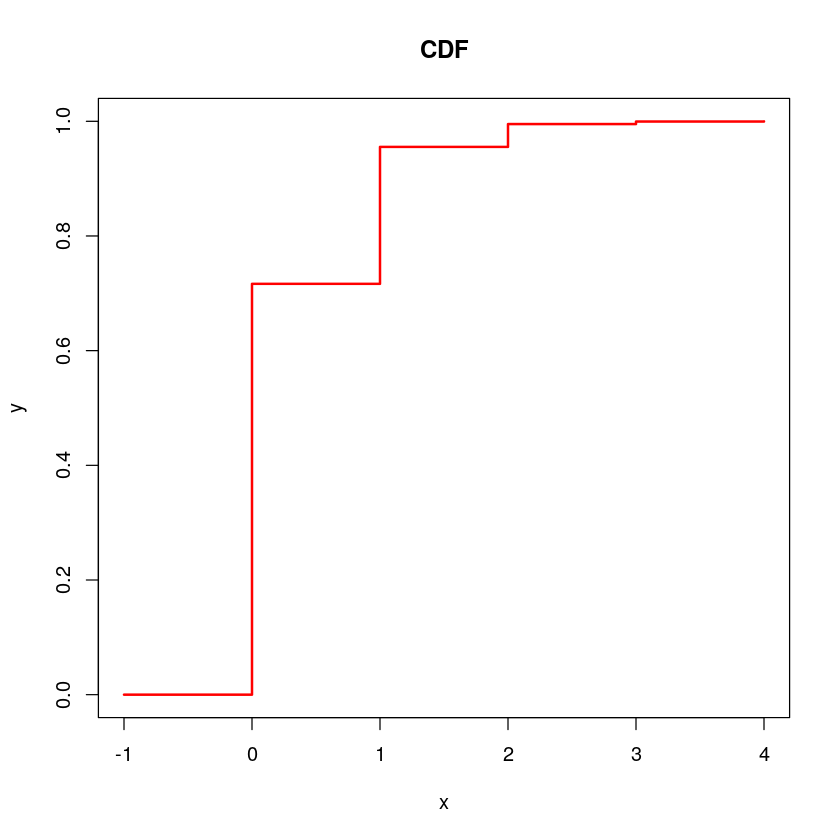

In [8]:
x=-1:4
y=ppois(x,1/3)
plot(x,y,type="s",lwd=2,col="red",main="CDF")

$$\Pr[X \ge 1] = 1 - \Pr[X \le 1] = 1 - exp\left[-\frac{1}{3}\right]= 0.28$$

## Exercise 4

With replacement means the card is put back each time it is drawn. <br>
Each trial is independent with success probability p. <br>
Let X=number of draws needed. <br><br>

Complementary cumulative distribution function (ccdf) is given by: 
$$F(k)=P(X \geq k)= \left(1-\frac{4}{52}\right)^{k-1}$$
<br>
$$P(X \geq 10)= 0.4865$$

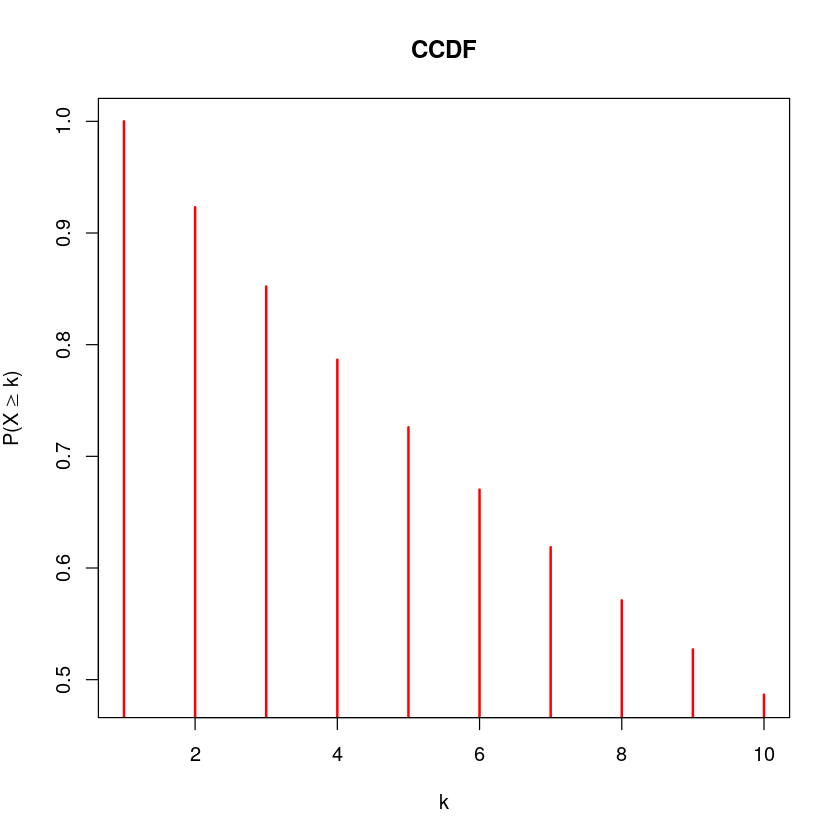

In [9]:
k_values=1:10
ccdf <- function(k){
    (1-(4/52))**(k-1)}
plot(ccdf(k_values),type="h",lwd=2,col="red",main="CCDF",xlab="k",ylab=TeX("$P(X \\geq k)$"))

## Exercise 5

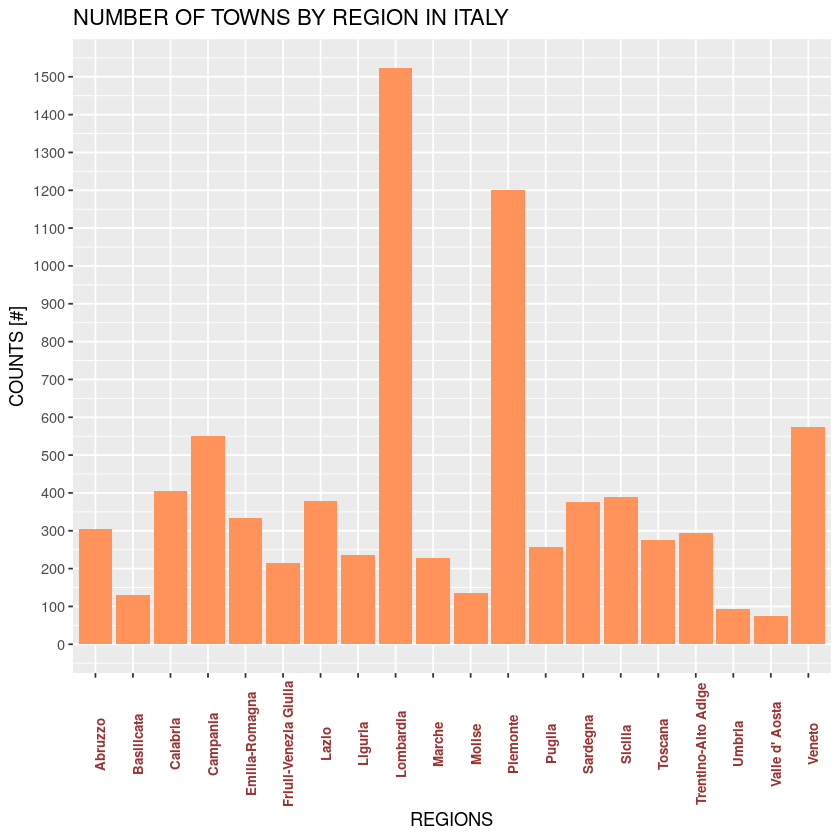

In [10]:
dirdata<-"/home/guida/Scrivania/MAGISTRALE/FIRST_YEAR/SECOND_SEMESTER/ADVANCED_STATISTICS_FOR_PHYSICS_ANALYSIS/EXERCISES/NOTEBOOKS_EXERCISES/rileseme_30062017_0.csv"
mydata<-read.csv(dirdata,header=TRUE, sep=';')
# num = c(1:20) 
ISTAT_code=c("Piemonte","Valle d' Aosta","Lombardia","Trentino-Alto Adige","Veneto","Friuli-Venezia Giulia","Liguria","Emilia-Romagna","Toscana","Umbria","Marche","Lazio","Abruzzo","Molise","Campania","Puglia","Basilicata","Calabria","Sicilia","Sardegna")
for(i in 1:20){
    mydata$REGIONE[mydata$REGIONE == i] <- ISTAT_code[i]}
library(ggplot2)
# counts
p1<-ggplot(data.frame(mydata$REGIONE), aes(x=mydata$REGIONE)) +geom_bar(fill="#FF9359")+theme(axis.text.x = element_text(face="bold", color="#993333", size=8, angle=90)) +ylab("COUNTS [#]")+xlab("REGIONS")
p1+ ggtitle("NUMBER OF TOWNS BY REGION IN ITALY")+scale_y_continuous(breaks = seq(0, 1600, by = 100))